## Linear Pipeline, Giessen-style synthetic data. 5 sensitive parameters.

In [1]:
from ModularCirc.Models.KorakianitisMixedModel import KorakianitisMixedModel, KorakianitisMixedModel_parameters, TEMPLATE_TIME_SETUP_DICT
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Import Simulation Data and Conduct PCA

Import the input and output data. Here we also import the recorded boolean variables where input parameters lead to a failed output. 

In [2]:
input_file = pd.read_csv("../Max_param_Emulator/Input/input_200.csv")
output_file = pd.read_csv("../Max_param_Emulator/Outputs/Output_200/pressure_traces_pat/all_pressure_traces.csv")

boolean_index = pd.read_csv("../Max_param_Emulator/bool_indices_200.csv")

In [3]:
output_file.head()

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,CO,dt,EF,dPAP,sPAP,mPAP
0,98.554532,98.374713,98.194999,98.015419,98.065898,100.511682,104.125117,107.372528,110.194969,112.199351,...,98.403685,98.225041,98.046397,97.867792,5.598052,0.008524,0.505802,1.275239,131.032941,28.012697
1,7.943028,7.839113,7.736032,7.633828,7.532544,7.497444,8.324686,10.203602,12.285247,14.061505,...,8.288133,8.181480,8.075503,7.970267,2.262669,0.007985,0.332051,0.351018,22.966594,6.223458
2,102.918282,102.792262,102.666301,102.540423,102.414644,102.289007,102.163525,102.038202,101.913058,101.788103,...,102.464799,102.340275,102.215649,102.090964,5.975510,0.005979,0.399170,0.437188,117.290276,36.609562
3,71.625310,71.549080,71.472802,71.396488,71.320152,71.243804,71.167455,71.091117,71.014796,71.006349,...,71.421868,71.346425,71.270882,71.195257,3.807105,0.007323,0.238584,6.127314,82.349217,23.093987
4,20.605775,20.224433,19.849060,19.479738,19.116644,18.759462,18.408535,18.066277,19.329764,24.081256,...,21.822211,21.421286,21.026767,20.637938,4.271845,0.006553,0.397228,0.387572,70.492150,24.742289


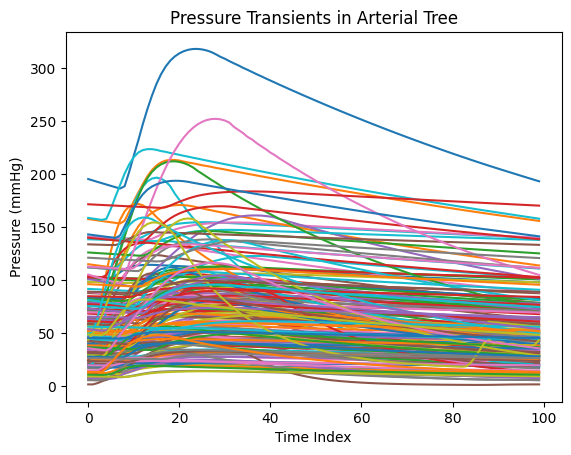

In [4]:
# Initialize the plot
fig, ax = plt.subplots()

for ind in range(len(output_file)): 
    t = range(100) # Time adjustment
    p_pat = output_file.iloc[ind, :100].values # Pressure transient

    # Plot the pressure transient for each realization
    ax.plot(t, p_pat, label=f'Realisation {ind}')

# Set labels and title
ax.set_xlabel('Time Index')
ax.set_ylabel('Pressure (mmHg)')
ax.set_title('Pressure Transients in Arterial Tree')

# Add legend to the plot
# ax.legend()

# Display the plot
plt.show()

In [5]:
# Clean the input data to remove failed to converge simulations
cleaned_input_df = input_file.drop(boolean_index['0'].values)
cleaned_input_df.head()

,# sas.v,sat.r,pat.r,pat.c,lv.E_act,lv.k_pas,rv.E_act,rv.k_pas,T,sas.r,...,ra.k_pas,ra.v,la.delay,ra.delay,lv.tr,rv.tr,la.tpww,ra.tpww,lv.td,rv.td
1,1233.892039,0.786039,1.098117,3.900694,3.532307,0.016141,3.307227,0.029000,0.843875,0.003,...,0.015,20.0,0.126581,0.126581,0.144091,0.144091,0.075949,0.075949,0.270672,0.270672
2,360.970665,1.297764,0.361891,1.267679,2.943370,0.014223,1.084777,0.020382,0.790478,0.003,...,0.015,20.0,0.118572,0.118572,0.214680,0.214680,0.071143,0.071143,0.333252,0.333252
3,1578.346823,0.953491,0.911772,4.387045,2.255881,0.029298,2.574295,0.011597,0.591915,0.003,...,0.015,20.0,0.088787,0.088787,0.208014,0.208014,0.053272,0.053272,0.296801,0.296801
4,1246.458241,1.195180,1.111108,5.656858,2.106818,0.022581,0.774917,0.023489,0.724955,0.003,...,0.015,20.0,0.108743,0.108743,0.148649,0.148649,0.065246,0.065246,0.257392,0.257392
5,568.560261,0.867594,0.577906,0.350796,2.791548,0.017507,2.177420,0.014704,0.648747,0.003,...,0.015,20.0,0.097312,0.097312,0.269779,0.269779,0.058387,0.058387,0.367091,0.367091


### Compute PCA Data

In [6]:
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

df = output_file.copy()

# Copy the data and separate the target variable (only pressure traces)
X = df.iloc[:,:100].copy() # traces only

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it - standardize
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names, index=df.index)

X_pca.head()



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,9.031776,-1.007261,-1.224812,0.032046,-0.139999,0.104781,0.105383,-0.014259,0.016302,0.013601
1,-12.916219,0.187867,0.316583,-0.115476,-0.098995,-0.006429,0.010095,0.002177,-0.021142,0.016469
2,9.173908,-1.862553,-0.781742,0.052752,0.177820,-0.050022,0.072200,0.002517,-0.004026,0.026124
3,1.468461,-1.367541,-0.667288,-0.117608,0.058867,-0.045945,-0.026110,-0.000117,0.034845,-0.011239
4,-6.237290,1.454041,2.521812,0.399380,0.009122,0.199812,-0.184021,0.048799,0.052338,0.034497


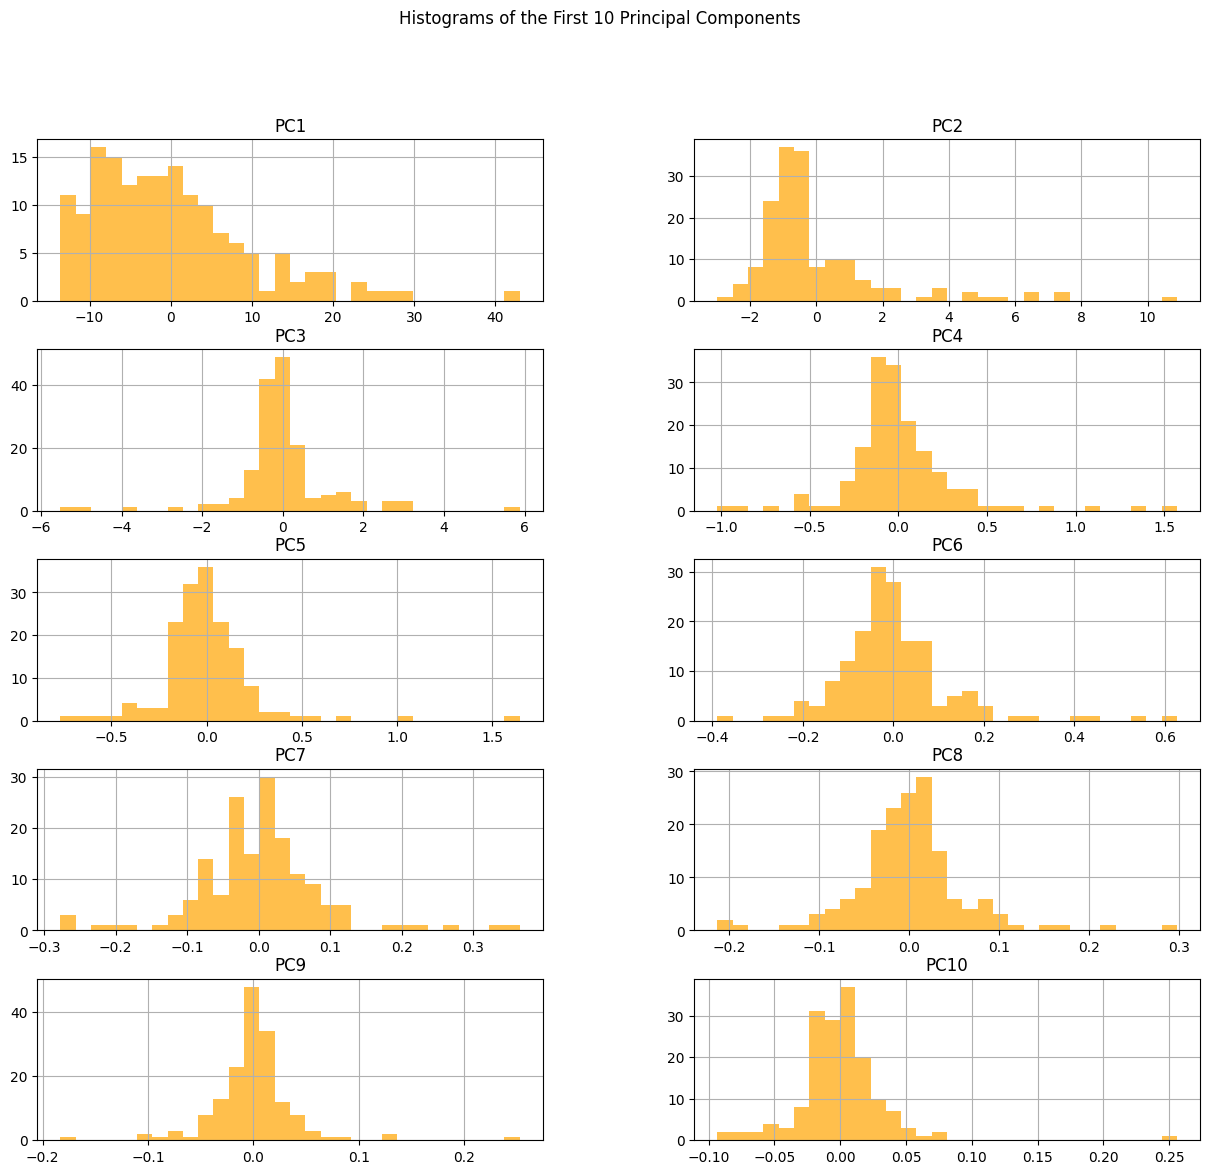

In [7]:
# Plot Histograms
X_pca.hist(bins=30, figsize=(15, 13), layout=(5, 2), alpha=0.7, color='orange')
plt.suptitle('Histograms of the First 10 Principal Components')
plt.show()

/var/folders/28/nchybyxs1ps5wk3zmnqdpd8r0000gr/T/ipykernel_47055/3676337090.py:9: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axs[0].set(


array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

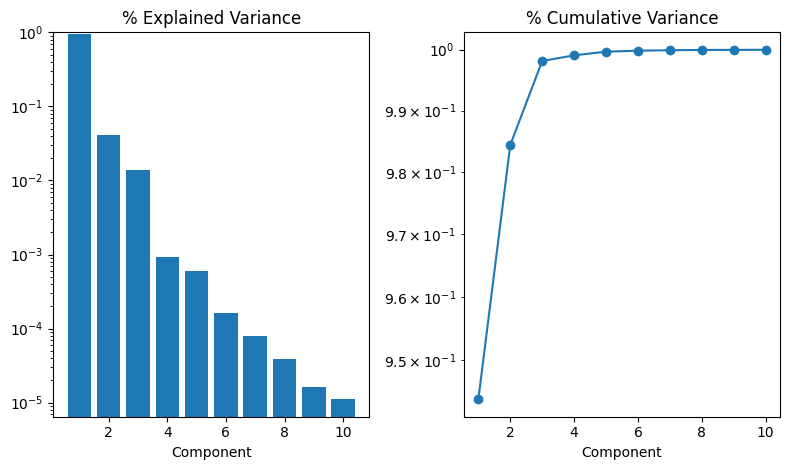

In [8]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    explained_variance_ratio = pca.explained_variance_ratio_
    axs[0].bar(grid, explained_variance_ratio, log=True)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )

    # Cumulative Variance
    cumulative_explained_variance = np.cumsum(explained_variance_ratio)
    axs[1].semilogy(grid, cumulative_explained_variance, "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", 
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    fig.tight_layout()
    return axs

plot_variance(pca)

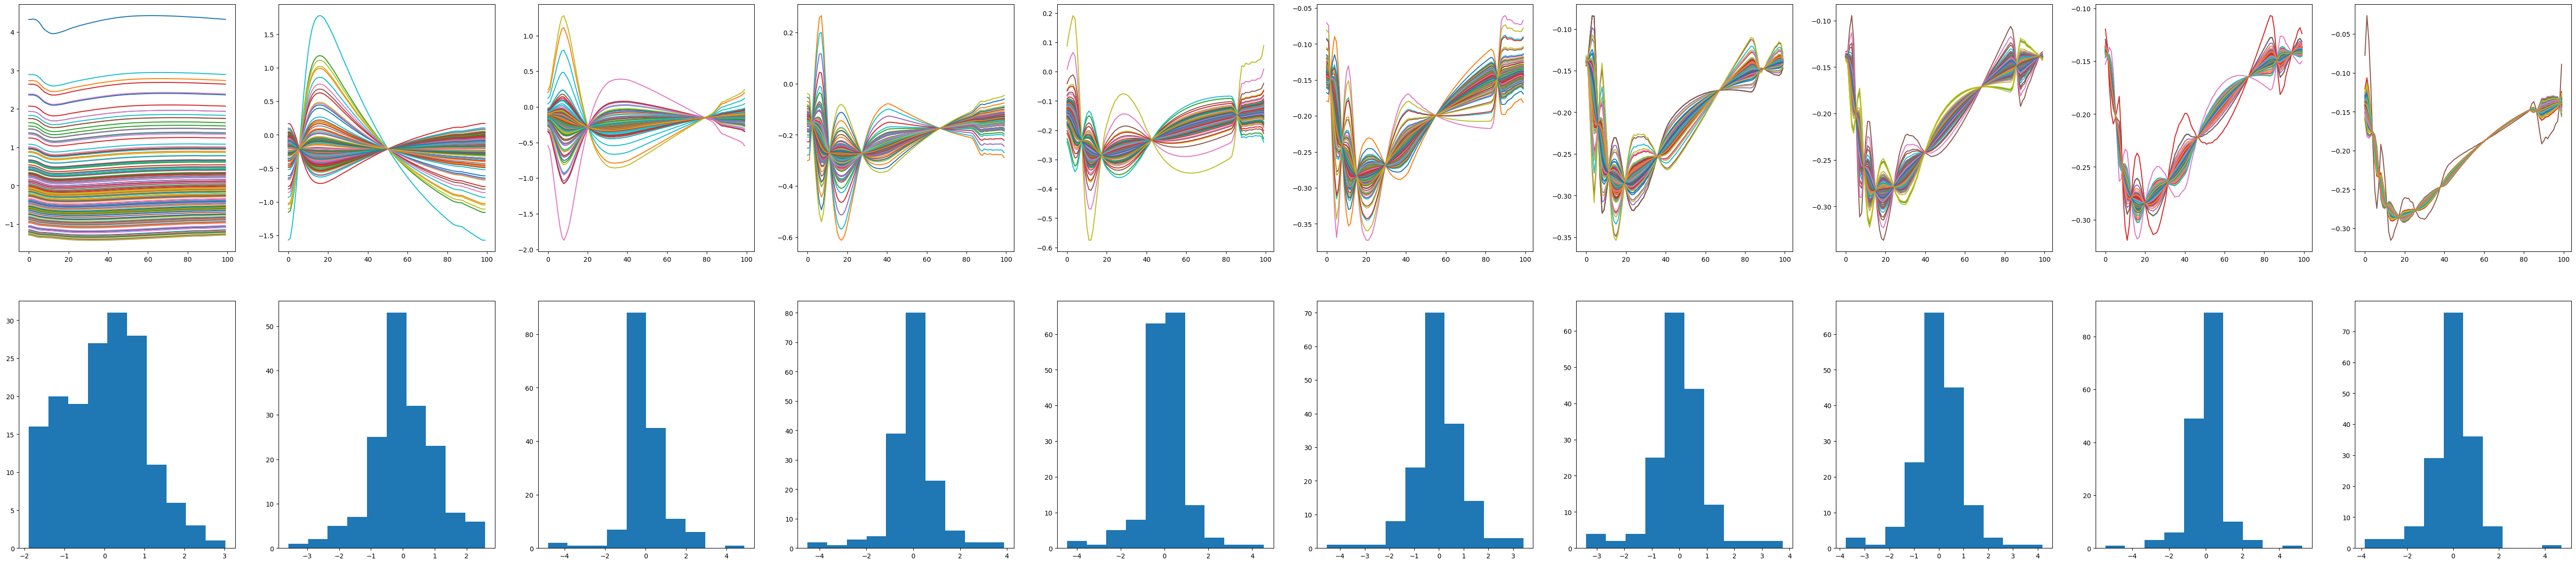

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  PowerTransformer


pipeline = Pipeline([
                ('scl', StandardScaler()),
                ('pca', PCA(n_components=10)),
                ('post',   PowerTransformer())
            ])

signals_pca = pipeline.fit_transform(X_scaled)

fig, ax = plt.subplots(ncols=10, nrows=2, figsize=(70, 15))

for i in range(signals_pca.shape[1]):
    temp = np.zeros(signals_pca.shape)
    temp[:, i] = signals_pca[:, i]
    
    signals_new = pipeline.inverse_transform(temp)
    
    ax[1][i].hist(signals_pca[:,i], bins=10)
    for signal in signals_new:
        ax[0][i].plot(signal)
        
plt.show()

In [10]:
kf = KFold(n_splits=5, random_state=1, shuffle=True)

explained_variance_ratios = []
pca_components = []

for train_index, test_index in kf.split(X_scaled):
    X_train, _ = X_scaled[train_index], X_scaled[test_index]
    
    pca = PCA(n_components=3)
    X_train_pca = pca.fit_transform(X_train)

    # Store the PCA components
    pca_components.append(pca.components_)
    # Store the explained variance ratio of this fold
    explained_variance_ratios.append(pca.explained_variance_ratio_)


explained_variance_ratios = np.array(explained_variance_ratios)

mean_explained_variance_ratio = np.mean(explained_variance_ratios, axis=0)
std_explained_variance_ratio = np.std(explained_variance_ratios, axis=0)

percentage_error = (std_explained_variance_ratio / mean_explained_variance_ratio) * 100
print(f'percentage error: \n{percentage_error}')
print(f'explained variance ratios: \n{explained_variance_ratios}')


percentage error: 
[ 1.11118216 19.04012302 19.48147262]
explained variance ratios: 
[[0.96234945 0.02647417 0.00966823]
 [0.94746507 0.03916432 0.01165799]
 [0.94083628 0.04252624 0.01467363]
 [0.93239933 0.04869507 0.01686061]
 [0.93646378 0.04579061 0.01580535]]


### Save PCA Data

In [11]:
n_sample = 200
path = os.getcwd()

os.system(f'mkdir -p {path}/Outputs/Output_{n_sample}/PCA')

# Save first 3 Principle Component data
for i in list(range(10)):

 PC = X_pca.iloc[:,i]
 PC.to_csv(f'{path}/Outputs/Output_{n_sample}/PCA/PC{i+1}.csv', index=False)



In [12]:
PC_list = []

for i in list(range(10)):
 
 PC = pd.read_csv(f'../Max_param_Emulator/Outputs/Output_200/PCA/PC{i+1}.csv')
 PC_list.append(PC)

PC_df = pd.DataFrame(np.array(PC_list).reshape(10,162).T)
PC_df.columns = ["PC1", "PC2", "PC3", "PC4", "PC5", 
                 "PC6", "PC7", "PC8", "PC9", "PC10" ]
output = pd.concat([output_file, PC_df], axis=1)
output

,0,1,2,3,4,5,6,7,8,9,...,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,98.554532,98.374713,98.194999,98.015419,98.065898,100.511682,104.125117,107.372528,110.194969,112.199351,...,9.031776,-1.007261,-1.224812,0.032046,-0.139999,0.104781,0.105383,-0.014259,0.016302,0.013601
1,7.943028,7.839113,7.736032,7.633828,7.532544,7.497444,8.324686,10.203602,12.285247,14.061505,...,-12.916219,0.187867,0.316583,-0.115476,-0.098995,-0.006429,0.010095,0.002177,-0.021142,0.016469
2,102.918282,102.792262,102.666301,102.540423,102.414644,102.289007,102.163525,102.038202,101.913058,101.788103,...,9.173908,-1.862553,-0.781742,0.052752,0.177820,-0.050022,0.072200,0.002517,-0.004026,0.026124
3,71.625310,71.549080,71.472802,71.396488,71.320152,71.243804,71.167455,71.091117,71.014796,71.006349,...,1.468461,-1.367541,-0.667288,-0.117608,0.058867,-0.045945,-0.026110,-0.000117,0.034845,-0.011239
4,20.605775,20.224433,19.849060,19.479738,19.116644,18.759462,18.408535,18.066277,19.329764,24.081256,...,-6.237290,1.454041,2.521812,0.399380,0.009122,0.199812,-0.184021,0.048799,0.052338,0.034497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,26.351282,26.295221,26.239217,26.183274,26.127391,26.071578,26.015836,25.960166,25.904577,25.849067,...,-9.568264,-0.986450,-0.031666,0.058944,-0.010624,-0.019409,0.014575,0.017709,-0.023297,-0.004091
158,48.681410,48.410334,48.141274,47.985302,50.440896,55.939835,61.697934,67.383889,72.613740,76.781088,...,-1.317102,0.895497,-0.654576,0.100873,-0.380533,0.154740,0.124931,-0.053849,-0.001220,-0.002961
159,75.508431,75.242732,74.977459,74.712649,74.448408,74.184758,73.921717,73.659364,73.397727,73.136814,...,3.824085,-0.910785,0.293383,0.035898,0.159141,-0.154169,0.027188,-0.056765,0.004328,0.019924
160,45.300962,45.227717,45.154490,45.081291,45.008127,44.935007,44.861938,44.788936,45.030953,46.331915,...,-4.756454,-0.957397,-0.359048,-0.115297,-0.038468,-0.008023,-0.026828,0.028472,-0.005008,-0.015971


### Train Linear Emulator

In [13]:
import contextlib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [14]:

# Select relevant inputs only
relevant_columns = []
for col in cleaned_input_df.columns:
    relevant_columns.append(col)
    if col == 'T': break

#columns_with_multiple_values = df_x.nunique() > 1
#filtered_input = df_x.loc[:, columns_with_multiple_values]

# Select only first 5 inputs 
filtered_input = cleaned_input_df[relevant_columns]


In [15]:
def emulate_linear(input, output):
 # Input and output data
 X = input
 Y = output

 # Initialize the model
 model = LinearRegression()

 # Fit the model to the training data
 model.fit(X, Y)

 # Predict the output for the test data
 y_pred = model.predict(X)

 # Compute R² score for the predictions versus actual test data
 r2 = r2_score(Y, y_pred)

 # compute MSE
 mse = mean_squared_error(Y, y_pred)
 
 return model, r2, mse

In [16]:
emulate_linear(filtered_input, output=output['EF'])

(LinearRegression(), 0.8431646212737014, 0.0015886269231828937)

In [17]:
# Initialize dictionaries to store R2 scores and models
linear_r2_scores = {}
linear_mse_scores = {}
fitted_models = {}

# List of output keys to process
output_keys = ['CO', 'EF', 'mPAP', 'dPAP', 'sPAP', 'PC1', 'PC2', 'PC3', 'PC4']

# Iterate through the output keys
for key in output_keys:
    model, r2, mse = emulate_linear(input=filtered_input, output=output[key])
    linear_r2_scores[key] = r2
    linear_mse_scores[key] = mse
    fitted_models[key] = model

# Convert the dictionaries to a DataFrame
results_df = pd.DataFrame({'R2_Score': linear_r2_scores, 'MSE': linear_mse_scores,  'Model': fitted_models})
# Now `results_df` will be a DataFrame with column names as indices, R2 scores, and models
print(results_df)

# Save the DataFrame to a CSV file (models will not be saved in this step)
results_df.to_csv(f'../Max_param_Emulator/Outputs/Emulators/linear_models_and_r2_scores_{n_sample}.csv')

# To save the DataFrame with models, use pickle
results_df.to_pickle(f'../Max_param_Emulator/Outputs/Emulators/linear_models_and_r2_scores_{n_sample}.csv')

# Compute MSE

 

      R2_Score         MSE               Model
CO    0.895160    0.633846  LinearRegression()
EF    0.843165    0.001589  LinearRegression()
mPAP  0.840021   40.860929  LinearRegression()
dPAP  0.447201    6.625146  LinearRegression()
sPAP  0.855933  373.892741  LinearRegression()
PC1   0.889598   10.421088  LinearRegression()
PC2   0.499854    2.024366  LinearRegression()
PC3   0.159805    1.153732  LinearRegression()
PC4   0.057293    0.088024  LinearRegression()


In [18]:
selected_rows = results_df.copy()
selected_rows

,R2_Score,MSE,Model
CO,0.895160,0.633846,LinearRegression()
EF,0.843165,0.001589,LinearRegression()
mPAP,0.840021,40.860929,LinearRegression()
dPAP,0.447201,6.625146,LinearRegression()
sPAP,0.855933,373.892741,LinearRegression()
PC1,0.889598,10.421088,LinearRegression()
PC2,0.499854,2.024366,LinearRegression()
PC3,0.159805,1.153732,LinearRegression()
PC4,0.057293,0.088024,LinearRegression()


### Calibrate Emulator 

In [34]:
filtered_input

,# sas.v,sat.r,pat.r,pat.c,lv.E_act,lv.k_pas,rv.E_act,rv.k_pas,T
1,1233.892039,0.786039,1.098117,3.900694,3.532307,0.016141,3.307227,0.029000,0.843875
2,360.970665,1.297764,0.361891,1.267679,2.943370,0.014223,1.084777,0.020382,0.790478
3,1578.346823,0.953491,0.911772,4.387045,2.255881,0.029298,2.574295,0.011597,0.591915
4,1246.458241,1.195180,1.111108,5.656858,2.106818,0.022581,0.774917,0.023489,0.724955
5,568.560261,0.867594,0.577906,0.350796,2.791548,0.017507,2.177420,0.014704,0.648747
...,...,...,...,...,...,...,...,...,...
194,370.983337,1.115175,0.876675,3.273519,3.519932,0.021404,1.383791,0.021185,0.661760
195,1560.646584,0.905673,0.324936,2.210075,1.582902,0.016322,2.994036,0.012478,0.720640
196,1287.245948,1.209039,0.676319,2.066229,1.432294,0.010537,1.885332,0.023078,0.578594
197,520.538435,1.016222,1.211894,3.770199,3.367177,0.025620,3.223261,0.014371,0.795101


In [20]:
filtered_output = output[output_keys]
filtered_output

,CO,EF,mPAP,dPAP,sPAP,PC1,PC2,PC3,PC4
0,5.598052,0.505802,28.012697,1.275239,131.032941,9.031776,-1.007261,-1.224812,0.032046
1,2.262669,0.332051,6.223458,0.351018,22.966594,-12.916219,0.187867,0.316583,-0.115476
2,5.975510,0.399170,36.609562,0.437188,117.290276,9.173908,-1.862553,-0.781742,0.052752
3,3.807105,0.238584,23.093987,6.127314,82.349217,1.468461,-1.367541,-0.667288,-0.117608
4,4.271845,0.397228,24.742289,0.387572,70.492150,-6.237290,1.454041,2.521812,0.399380
...,...,...,...,...,...,...,...,...,...
157,1.872477,0.253833,10.655562,0.392465,30.308234,-9.568264,-0.986450,-0.031666,0.058944
158,7.950405,0.585529,19.455354,0.287830,100.217026,-1.317102,0.895497,-0.654576,0.100873
159,6.962093,0.418346,32.259925,1.543635,95.958501,3.824085,-0.910785,0.293383,0.035898
160,2.326678,0.357007,13.605540,0.171120,53.353855,-4.756454,-0.957397,-0.359048,-0.115297


In [21]:
# Build beta matrix (d * p, where d is dimension of y_obs and p is dimension of X)
beta_matrix = []
intercept = []

# Selects which observation to calibrate on
which_obs = 3

for index, row_entry in selected_rows.iterrows():
    model = row_entry['Model']
    coeffs = model.coef_
    b0 = model.intercept_

    beta_matrix.append(coeffs)
    intercept.append(b0)

# Convert the list to a NumPy array
beta_matrix = np.array(beta_matrix)
intercept = np.array(intercept)
intercept = intercept.reshape(len(intercept),1)

print(beta_matrix.shape)
print(intercept.shape)

# Select observation and reshape to be (d, 1)
Y_obs = np.array(filtered_output.T[which_obs])
Y_obs = Y_obs.reshape(len(Y_obs), 1)
print(Y_obs.shape)

# Scale observation by intercepts of models
Y_scaled = Y_obs - intercept
print(Y_scaled.shape)

# Compute the pseudo-inverse of the coefficient matrix
beta_inv = np.linalg.inv(beta_matrix.T @ beta_matrix) @ beta_matrix.T
x_hat = beta_inv @ Y_scaled



(9, 9)
(9, 1)
(9, 1)
(9, 1)


In [24]:
# Convert the calibrated inputs to a DataFrame
x_hat_df = pd.DataFrame(x_hat, index=filtered_input.iloc[which_obs].T.index)

# Concatenate the true input value and calibrated values
result = pd.concat([filtered_input.iloc[which_obs].T, x_hat_df], axis=1)

# Rename the columns
result.columns = ['x_true', 'x_calibrated']

result

,x_true,x_calibrated
# sas.v,1246.458241,2649.844627
sat.r,1.195180,3.425064
pat.r,1.111108,0.404947
pat.c,5.656858,4.307284
lv.E_act,2.106818,2.428311
lv.k_pas,0.022581,0.022025
rv.E_act,0.774917,-3.526036
rv.k_pas,0.023489,-0.022532
T,0.724955,1.409662


In [23]:
# Feed calibrated x_hat back into linear model 
y_calibrated = (beta_matrix @ x_hat) + intercept 

y_compare = np.hstack([Y_obs, y_calibrated])
y_compare = pd.DataFrame(y_compare)
y_compare.columns = ("y_true", "y_calibrated")

y_compare.to_csv('multiple_output_calibration_result_y.csv', index=False)
y_compare

,y_true,y_calibrated
0,3.807105,3.807105
1,0.238584,0.238584
2,23.093987,23.093987
3,6.127314,6.127314
4,82.349217,82.349217
5,1.468461,1.468461
6,-1.367541,-1.367541
7,-0.667288,-0.667288
8,-0.117608,-0.117608


### Plot Observation 

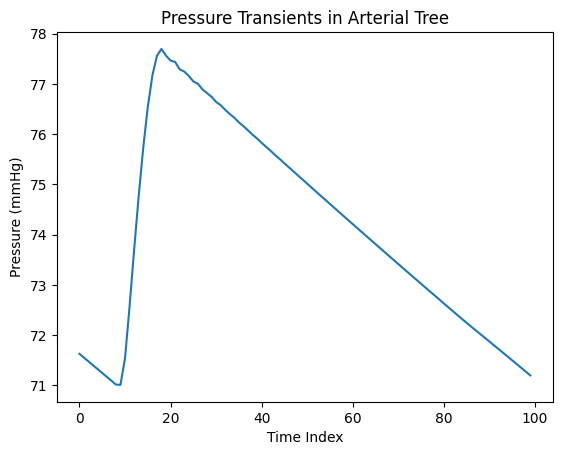

In [26]:
fig, ax = plt.subplots()

ind = which_obs

t = range(100) # Time adjustment
p_pat = output_file.iloc[ind, :100].values # Pressure transient

# Plot the pressure transient for each realization
ax.plot(t, p_pat, label=f'Realisation {ind}')

# Set labels and title
ax.set_xlabel('Time Index')
ax.set_ylabel('Pressure (mmHg)')
ax.set_title('Pressure Transients in Arterial Tree')

# Add legend to the plot
# ax.legend()

# Display the plot
plt.show()

### Bayesian Calibration 

In [27]:
## Define priors
# mean
sas_v_mu = 1237.5
r_sat_mu = 1.07
r_pat_mu = 0.698
c_pat_mu = 5.64
lv_e_mu = 2.5
lv_k_mu = 0.0199
rv_e_mu = 2.013
rv_k_mu = 0.0199
t_mu = 0.68

# variances
sas_v_sd = 320.83**2
r_sat_sd = 0.174**2
r_pat_sd = 0.181**2
c_pat_sd = 0.94**2
lv_e_sd = 0.42**2
lv_k_sd = 0.0034**2
rv_e_sd = 0.479**2
rv_k_sd = 0.0034**2
t_sd = 0.093**2 

mu_0 = np.array([sas_v_mu, r_sat_mu, r_pat_mu, c_pat_mu,  
                 lv_e_mu, lv_k_mu, rv_e_mu, rv_k_mu, t_mu])[:, np.newaxis]
Sd = [sas_v_sd, r_sat_sd, r_pat_sd, c_pat_sd, lv_e_sd, lv_k_sd, rv_e_sd, rv_k_sd, t_sd]
Sigma_0 = np.diag(Sd)

# Build beta matrix (d * p, where d is dimension of y_obs and p is dimension of X)
beta_matrix = []
intercept = []

# Selects which observation to calibrate on
which_obs = 3

for index, row_entry in selected_rows.iterrows():
    model = row_entry['Model']
    coeffs = model.coef_
    b0 = model.intercept_

    beta_matrix.append(coeffs)
    intercept.append(b0)

# Convert the list to a NumPy array
beta_matrix = np.array(beta_matrix)
intercept = np.array(intercept)
intercept = intercept.reshape(len(intercept),1)

# Select observation and reshape to be (d, 1)
Y_obs = np.array(filtered_output.T[which_obs])
Y_obs = Y_obs.reshape(len(Y_obs), 1)

# Scale observation by intercepts of models
Y_scaled = Y_obs - intercept

# Compute the posterior covariance
Sigma_post_inv = (beta_matrix.T @ beta_matrix) + np.linalg.inv(Sigma_0)
Sigma_post = np.linalg.inv(Sigma_post_inv)

# Cmpute the posterior mean
Mu_post = Sigma_post @ (beta_matrix.T @ Y_scaled + np.linalg.inv(Sigma_0) @ mu_0)


In [31]:
# Convert the calibrated inputs to a DataFrame
Mu_post_df = pd.DataFrame(Mu_post, index=filtered_input.iloc[which_obs].T.index)
true_observation = pd.DataFrame(filtered_input.iloc[which_obs])

# Concatenate the true input value and calibrated values
bayes_result = pd.concat([filtered_input.iloc[which_obs].T, Mu_post_df], axis=1)

# Rename the columns
bayes_result.columns = ['x_true', 'x_calibrated']

bayes_result

,x_true,x_calibrated
# sas.v,1246.458241,1165.531022
sat.r,1.195180,1.198641
pat.r,1.111108,0.873293
pat.c,5.656858,4.129672
lv.E_act,2.106818,2.428237
lv.k_pas,0.022581,0.020418
rv.E_act,0.774917,1.355923
rv.k_pas,0.023489,0.018689
T,0.724955,0.620324


In [29]:
# Feed calibrated x_hat back into linear model 
y_calibrated = (beta_matrix @ Mu_post) + intercept 

y_compare = np.hstack([Y_obs, y_calibrated])
y_compare = pd.DataFrame(y_compare)
y_compare.columns = ("y_true", "y_calibrated")

#y_compare.to_csv('multiple_output_calibration_result_y.csv', index=False)
y_compare

,y_true,y_calibrated
0,3.807105,4.664686
1,0.238584,0.302153
2,23.093987,25.098548
3,6.127314,2.520057
4,82.349217,81.737187
5,1.468461,1.638925
6,-1.367541,-1.798943
7,-0.667288,-0.257908
8,-0.117608,-0.011541


In [32]:
## Define priors
# mean
sas_v_mu = 1237.5
r_sat_mu = 1.07
r_pat_mu = 0.698
c_pat_mu = 5.64
lv_e_mu = 2.5
lv_k_mu = 0.0199
rv_e_mu = 2.013
rv_k_mu = 0.0199
t_mu = 0.68

# variances
sas_v_sd = 320.83**2
r_sat_sd = 0.174**2
r_pat_sd = 0.181**2
c_pat_sd = 0.94**2
lv_e_sd = 0.42**2
lv_k_sd = 0.0034**2
rv_e_sd = 0.479**2
rv_k_sd = 0.0034**2
t_sd = 0.093**2 


mu_0 = np.array([sas_v_mu, r_sat_mu, r_pat_mu, c_pat_mu,  
                 lv_e_mu, lv_k_mu, rv_e_mu, rv_k_mu, t_mu])[:, np.newaxis]
Sd = [sas_v_sd, r_sat_sd, r_pat_sd, c_pat_sd, lv_e_sd, lv_k_sd, rv_e_sd, rv_k_sd, t_sd]
Sigma_0 = np.diag(Sd)

# Build beta matrix (d * p, where d is dimension of y_obs and p is dinemnsion of X)
beta_matrix = []
intercept = []

for index, row_entry in selected_rows.iterrows():
    model = row_entry['Model']
    coeffs = model.coef_
    b0 = model.intercept_

    beta_matrix.append(coeffs)
    intercept.append(b0)

# Convert the list to a NumPy array
beta_matrix = np.array(beta_matrix)
intercept = np.array(intercept)
intercept = intercept.reshape(len(intercept),1)

x_differences = []

for row in range(10):
 # Select observation and reshape to be (d, 1)
 Y_obs = np.array(filtered_output.T[row])
 Y_obs = Y_obs.reshape(len(Y_obs), 1)
 
 # Scale observation by intercepts of models
 Y_scaled = Y_obs - intercept


 # Compute the posterior covariance
 Sigma_post_inv = (beta_matrix.T @ beta_matrix) + np.linalg.inv(Sigma_0)
 Sigma_post = np.linalg.inv(Sigma_post_inv)

 # Cmpute the posterior mean
 Mu_post = Sigma_post @ (beta_matrix.T @ Y_scaled + np.linalg.inv(Sigma_0) @ mu_0)

 # Compute squared-diff between true and calibrated x
 true = np.array(filtered_input.iloc[row].T)
 true = true.reshape(len(mu_0),1)
 diff = (Mu_post - true)**2 

 # Append arrary
 x_differences.append(diff)

# Compute MSE
bayes_mse_x = np.mean(np.hstack(x_differences), axis=1)

bayes_mse_x_df = pd.DataFrame(bayes_mse_x)
bayes_mse_x_df.columns = ['MSE']
bayes_mse_x_df.index = filtered_input.columns
#bayes_mse_x_df.to_csv('bayes_MSE_multi_output_x.csv')

bayes_mse_x_df

,MSE
# sas.v,115431.612352
sat.r,0.074287
pat.r,0.022061
pat.c,3.078643
lv.E_act,0.339861
lv.k_pas,0.000042
rv.E_act,0.443808
rv.k_pas,0.000064
T,0.026679


/var/folders/28/nchybyxs1ps5wk3zmnqdpd8r0000gr/T/ipykernel_47055/30050377.py:66: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


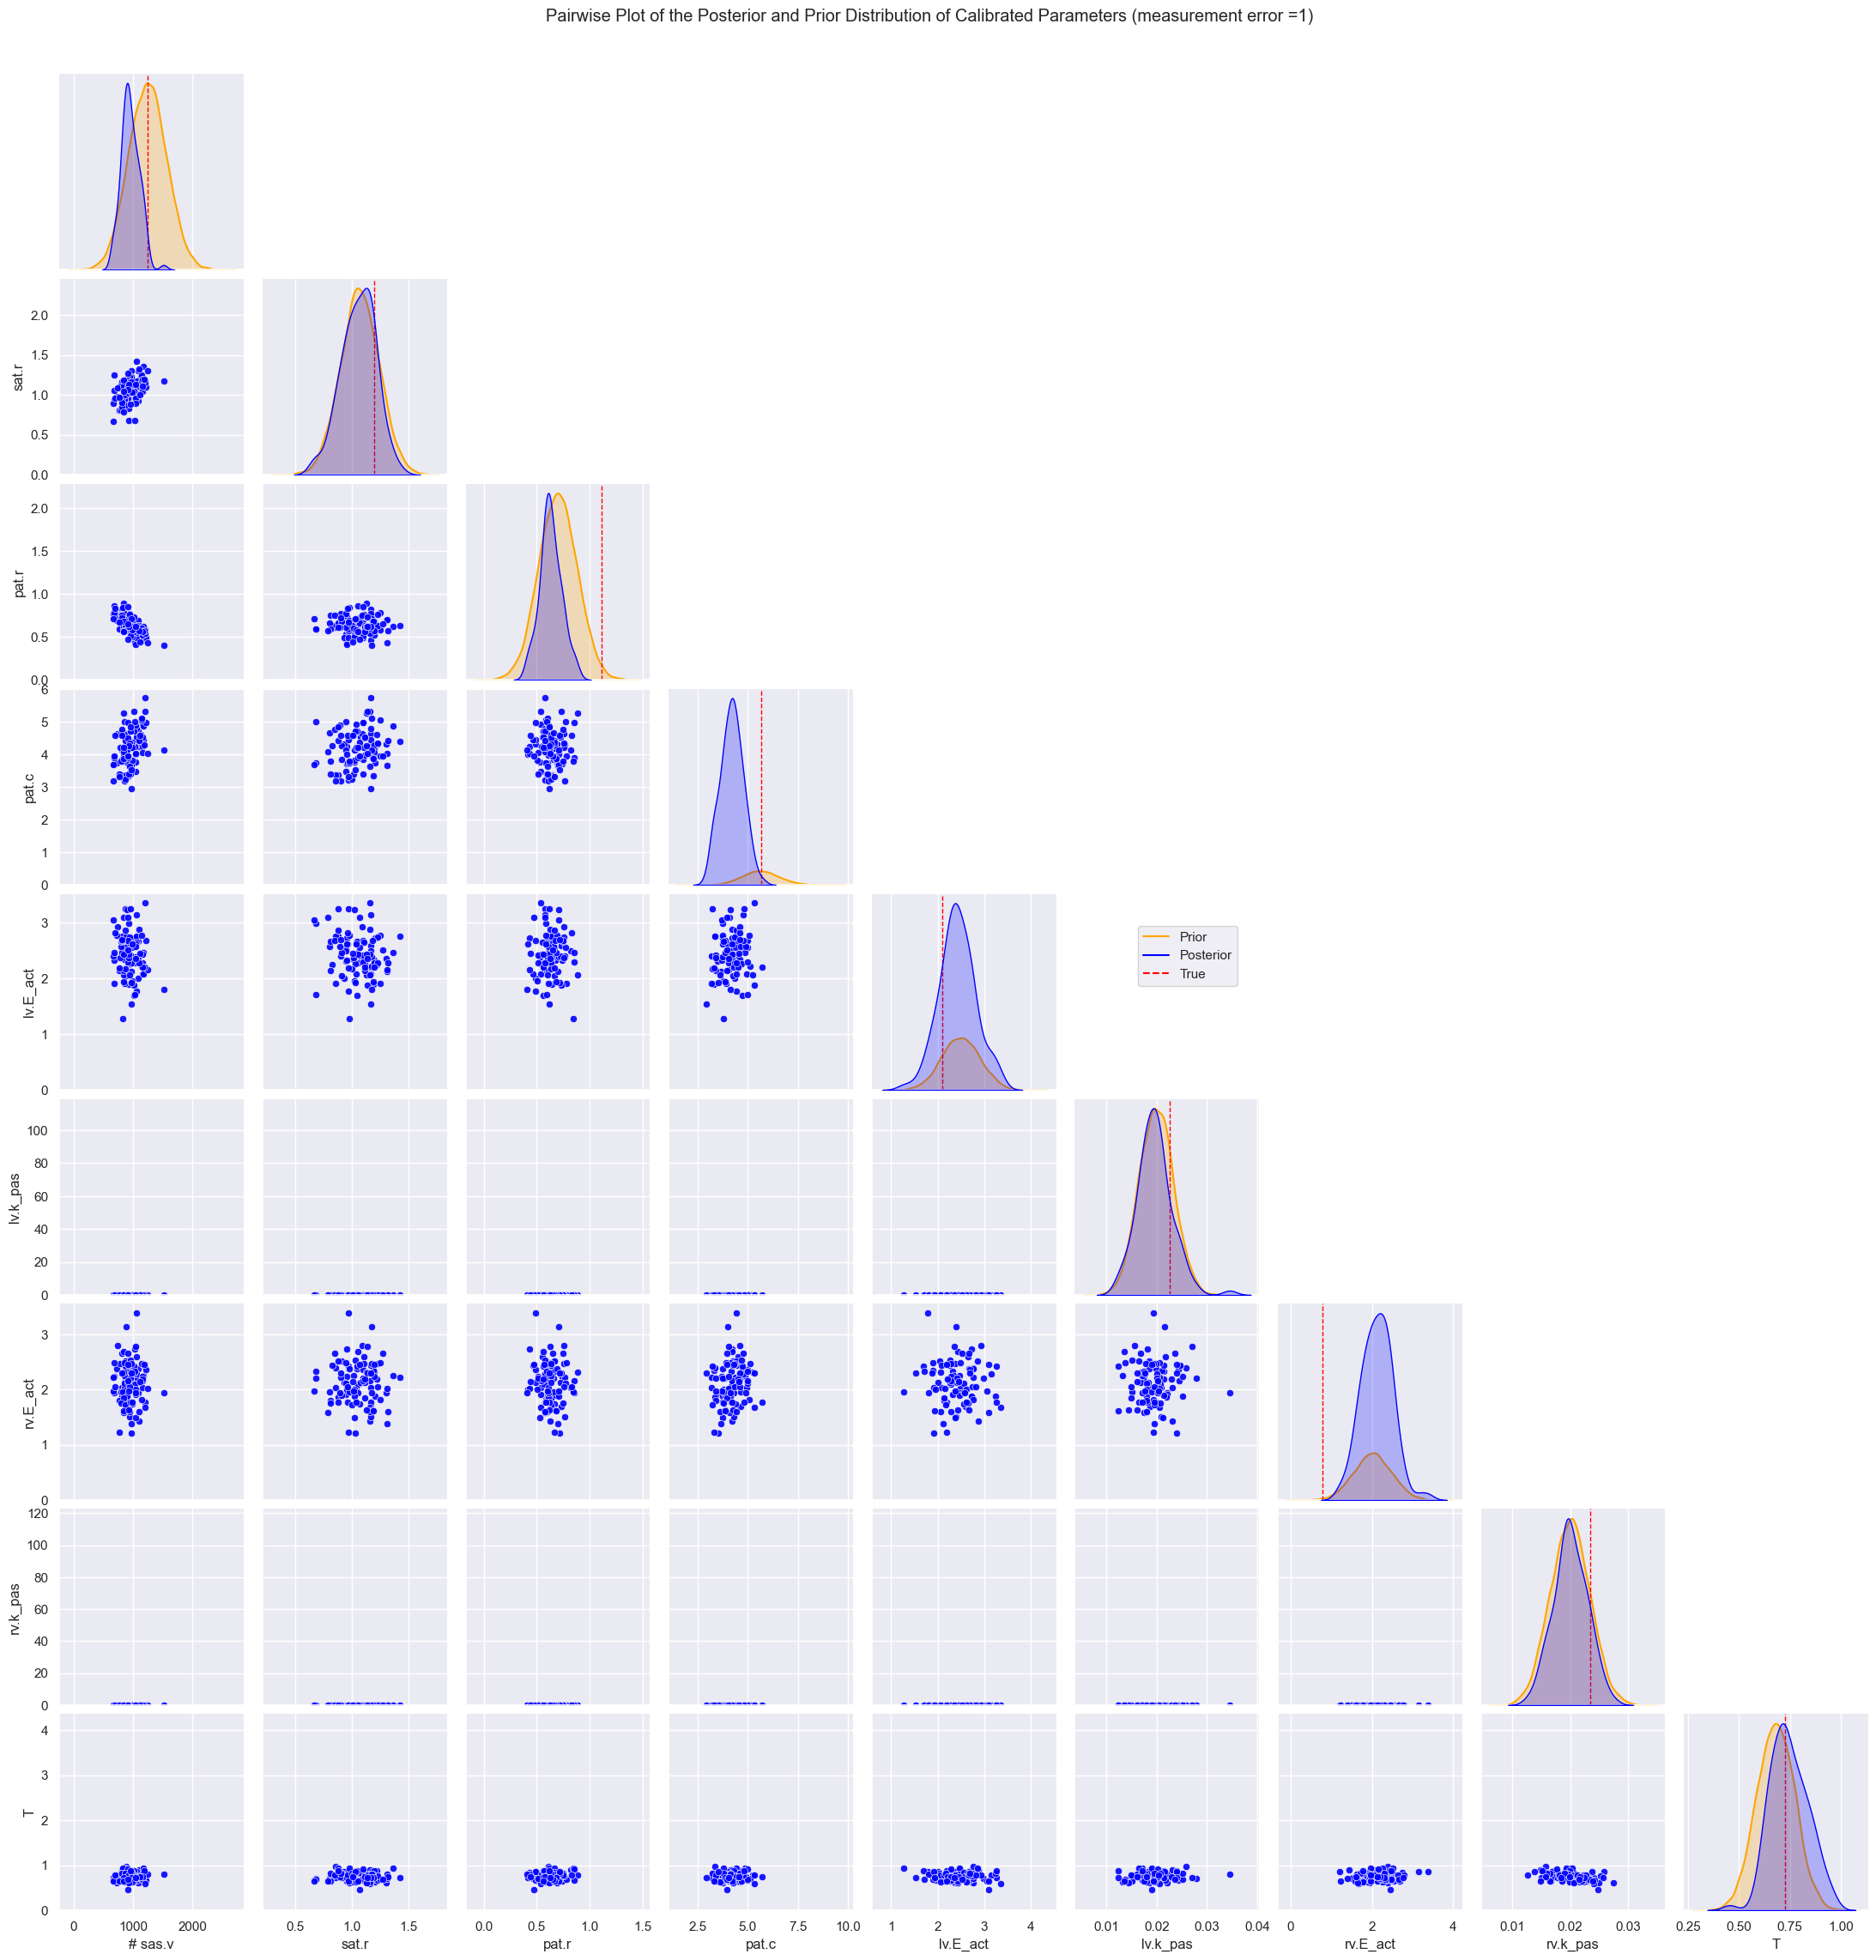

In [33]:
from matplotlib.lines import Line2D

# Define the prior mean and covariance 
mu_prior = mu_0.copy().reshape(-1)
sigma_prior = Sigma_0.copy()

# Define the posterior mean (mu) and covariance matrix (sigma)
mu = Mu_post.reshape(-1)
sigma = Sigma_post

# True values of X
true_values = filtered_input.iloc[which_obs].T

parameter_names = bayes_mse_x_df.index.values.tolist()

# Generate random samples
rng = np.random.default_rng(1)  # Using your specific random generator seed
samples = rng.multivariate_normal(mu, sigma, size=100)   ### sigma is a variance matrix 
prior_samples = rng.multivariate_normal(mu_prior, sigma_prior, size=10000)

# Convert samples to a DataFrame for pairplot visualization
columns = [f"X{i+1}" for i in range(len(mu))]
df = pd.DataFrame(samples, columns=parameter_names)

# Pairplot visualization
sns.set(style="darkgrid")
g = sns.pairplot(df, diag_kind='kde', plot_kws={"color": "blue", "alpha": 0.9}, diag_kws={"color": "blue"}, corner=True)


# Add dashed lines to each diagonal plot
for i, ax in enumerate(np.diag(g.axes)):
    # Add true value line
    ax.axvline(true_values.iloc[i], color='red', linestyle='--', linewidth=1)
    
    # Calculate and plot the prior distribution's KDE
    sns.kdeplot(
        prior_samples[:, i], 
        ax=ax, 
        color="orange", 
        fill="orange",
        linestyle='-', 
        linewidth=1.5, 
        label='Prior'
    )
    
 #   # Plot the posterior distribution
  #  sns.kdeplot(
   #     df.iloc[:, i],
    #    ax=ax,
     #   color="blue",
      #  linestyle='-',
       # linewidth=1.5,
        #label='Posterior'
    #)
  

                  
prior_line = Line2D([0], [0], color='orange', linestyle='-', linewidth=1.5, label='Prior')
posterior_line = Line2D([0], [0], color='blue', linestyle='-', linewidth=1.5, label='Posterior')        
true_line = Line2D([0], [0], color='red', linestyle='--', linewidth=1.5, label='True')
# Add legend to the plot
ax.legend(handles=[prior_line, posterior_line, true_line], loc="upper left",  bbox_to_anchor=(-3, 5.05))

# Adjust the layout and add the title
plt.suptitle("Pairwise Plot of the Posterior and Prior Distribution of Calibrated Parameters (measurement error =1)", y=1.02)
plt.tight_layout()
# Save the plot as a PNG file
plt.savefig("../Reports/calibrate_post_noise1.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
plt.show()